In [1]:
from image_process import *

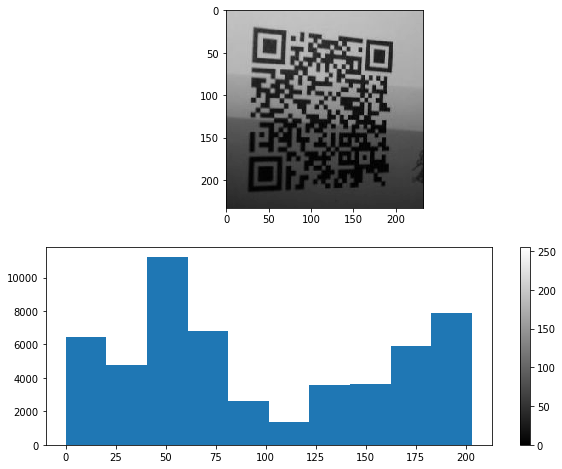

In [7]:
img = img_load('k-1.jpg')
imshow(img, 'gray')

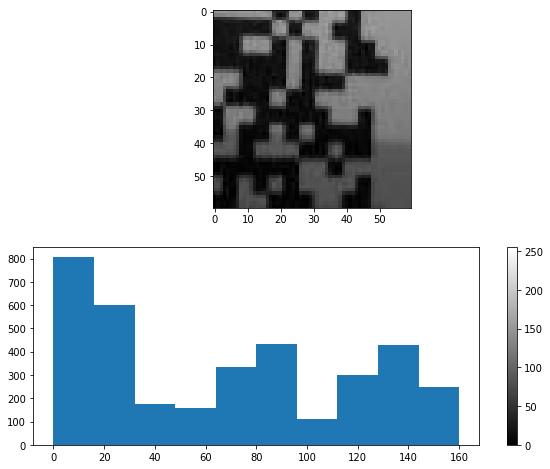

In [8]:
box = img[100:160, 140:200]
box
imshow(box, 'gray')

In [9]:
box_mean= np.mean(box)
box_mean

66.34444444444445

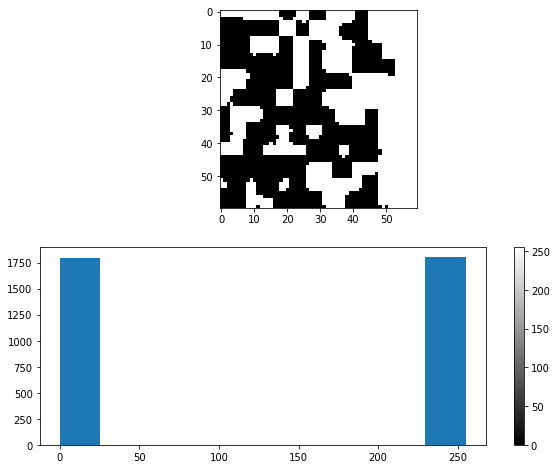

In [10]:
box = binarization(box, box_mean)

23 23


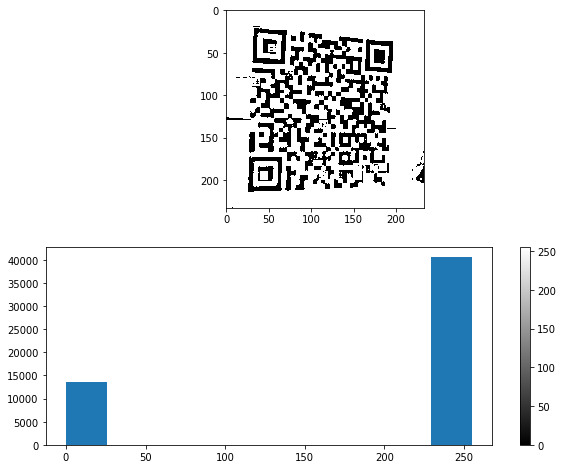

In [11]:
p2 = box_mean_threshold(img, 10)

In [12]:
box = img[0:10, 0:10]
print(np.mean(box))
print(box)

193.08
[[193 193 193 193 193 193 193 193 193 194]
 [193 193 193 193 193 193 193 193 193 194]
 [193 193 193 193 193 193 193 193 193 194]
 [193 193 193 193 193 193 193 193 193 194]
 [193 193 193 193 193 193 193 193 193 194]
 [193 193 193 193 193 193 193 193 193 194]
 [193 193 193 193 193 193 193 193 193 194]
 [193 193 193 193 193 193 193 193 193 194]
 [193 193 193 193 193 193 193 193 193 193]
 [193 193 193 193 193 193 193 193 193 193]]


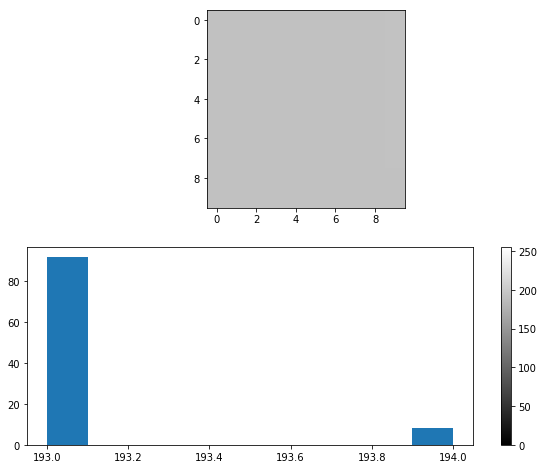

In [13]:
imshow(box, 'gray')

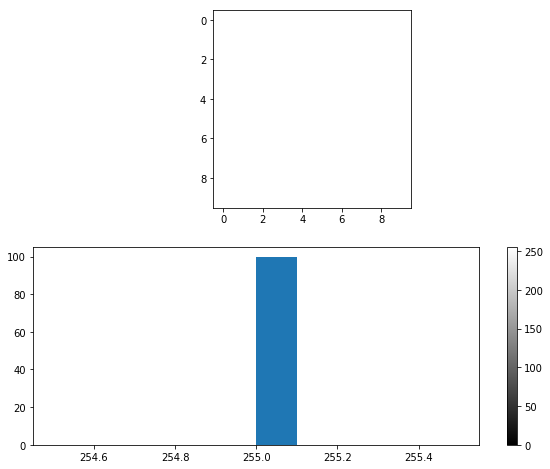

In [14]:
box1 = binarization(box, np.mean(box)-10)

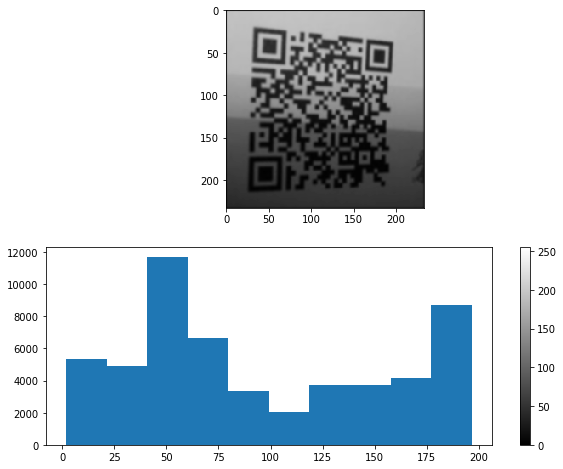

In [15]:
p3 = gaussian(img)

23 23


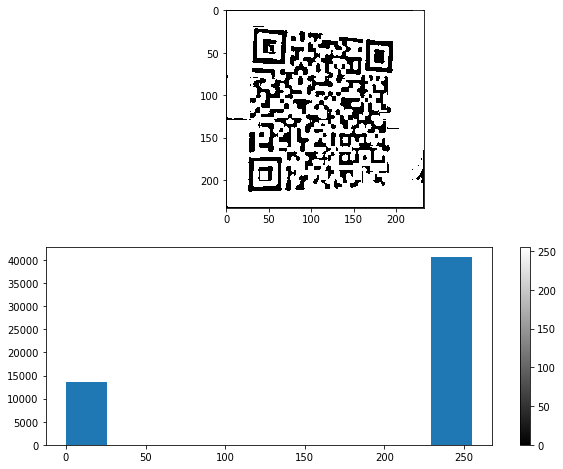

In [16]:
p4 =  box_mean_threshold(p3, 10)

In [17]:
#box_g_p1= binarization(box_g, g_mean)

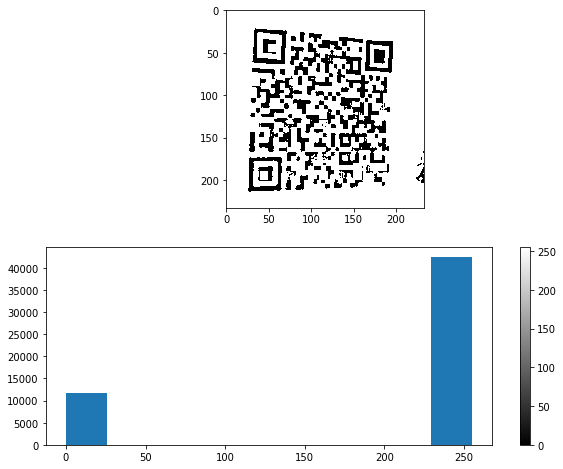

In [18]:
p5 = box_gaussian_threshold(img, 10)

In [20]:
img2 = img_load('k-2.jpg')

47 63


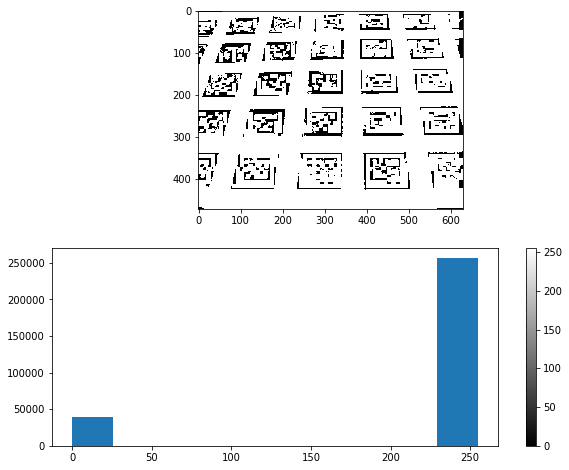

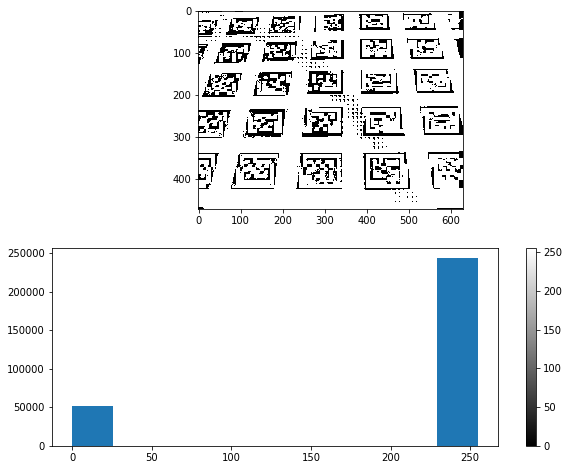

In [22]:
img2_p1 = box_gaussian_threshold(img2, 10)
img2_p2 = box_mean_threshold(img2, 10)

In [23]:
img7 = img_load('k-7.jpg', 'gray')

39 53


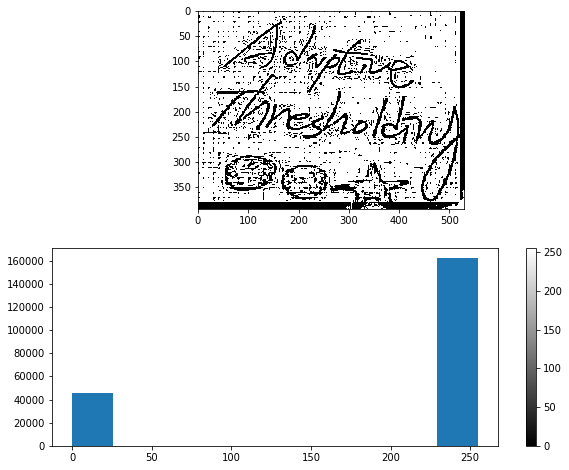

In [26]:
img7_p2 = box_mean_threshold(img7, 10, mean_range=2)

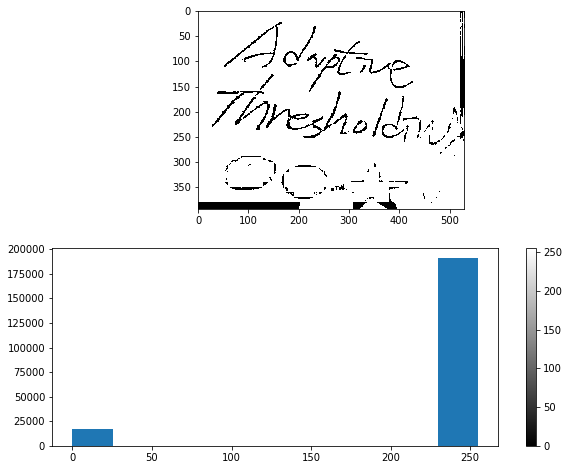

In [27]:
img7_p3 = box_gaussian_threshold(img7, 10, mean_range=2)

In [40]:
img6 = img_load('k-6.jpg')

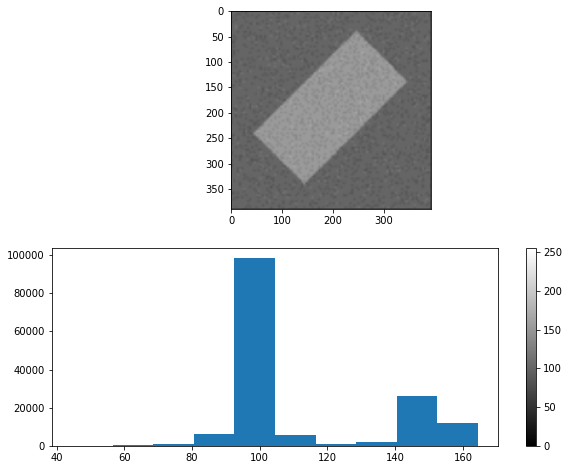

In [41]:
img6_p1 = gaussian(img6)

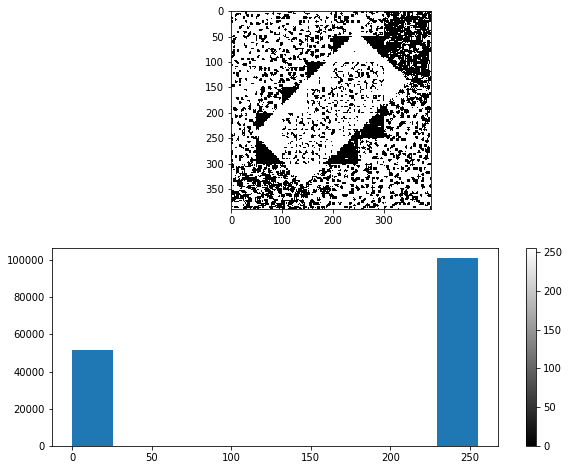

In [39]:
img6_p1 = box_gaussian_threshold(img6, 50, mean_range=0)

1 1


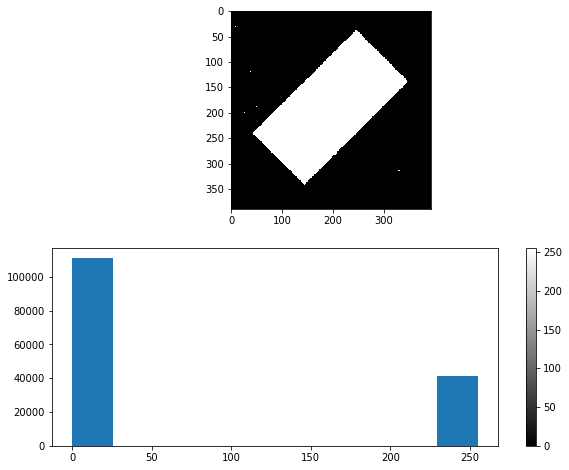

In [48]:
img6_p2 = box_mean_threshold(img6_p1, img6_p1.shape[0], mean_range=0)

In [4]:
import numpy as np

In [5]:
def get_hist(img, bins = 256):
    flat = img.flatten()
    imshow(img, 'gray', bins-1)
    return np.histogram(img7, bins = bins, range=[0,bins])[0]

In [62]:
hist7 = get_hist(img7)

In [51]:
def get_weighted(hist, i, j):
    return np.sum(hist[i:j])

In [52]:
def find_center(min_v =0, max_v=255):
    center = (int)((min_v + max_v)/2)
    return center

In [243]:
def _BHT(hist):
    histogram = hist
    start, end = 0, 255
    mean = find_center(start, end)
    left_weight = np.sum(histogram[:mean])
    right_weight = np.sum(histogram[mean:])
    
    print(left_weight, right_weight, start, end, mean, end='\n')
    while(start != end):
        if(right_weight > left_weight):
            right_weight -= histogram[end]
            print(histogram[end])
            end -= 1
            if find_center(start, end) < mean:
                print(histogram[mean-1])
                left_weight -= histogram[mean-1]
                right_weight += histogram[mean-1]
                if mean > 0:
                    mean -= 1
        else:
            left_weight -= histogram[start]
            start += 1
            if find_center(start, end) > mean:
                print(histogram[mean])
                left_weight += histogram[mean]
                right_weight -= histogram[mean]
                if mean < 255:
                    mean += 1
        print(left_weight, right_weight, start, end, mean, end='\n')
                
    print(mean)
    return mean

In [235]:
test_img = img_load('test.jpg')

In [252]:
a = np.array(range(256))
a

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [253]:
a_bht = _BHT(a)

8001 24639 0 255 127
255
8001 24384 0 254 127
254
126
7875 24256 0 253 126
253
7875 24003 0 252 126
252
125
7750 23876 0 251 125
251
7750 23625 0 250 125
250
124
7626 23499 0 249 124
249
7626 23250 0 248 124
248
123
7503 23125 0 247 123
247
7503 22878 0 246 123
246
122
7381 22754 0 245 122
245
7381 22509 0 244 122
244
121
7260 22386 0 243 121
243
7260 22143 0 242 121
242
120
7140 22021 0 241 120
241
7140 21780 0 240 120
240
119
7021 21659 0 239 119
239
7021 21420 0 238 119
238
118
6903 21300 0 237 118
237
6903 21063 0 236 118
236
117
6786 20944 0 235 117
235
6786 20709 0 234 117
234
116
6670 20591 0 233 116
233
6670 20358 0 232 116
232
115
6555 20241 0 231 115
231
6555 20010 0 230 115
230
114
6441 19894 0 229 114
229
6441 19665 0 228 114
228
113
6328 19550 0 227 113
227
6328 19323 0 226 113
226
112
6216 19209 0 225 112
225
6216 18984 0 224 112
224
111
6105 18871 0 223 111
223
6105 18648 0 222 111
222
110
5995 18536 0 221 110
221
5995 18315 0 220 110
220
109
5886 18204 0 219 109
219
588

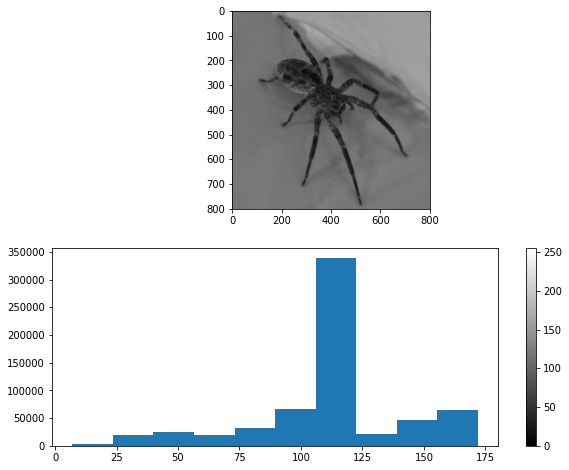

In [238]:
test_hist = get_hist(test_img)
test_hist
imshow(test_img, 'gray')

In [239]:
test_bht = _BHT(test_hist)

520165 119835 0 255 127
956
521121 118879 1 255 128
521121 118879 2 255 128
475
521596 118404 3 255 129
521596 118404 4 255 129
423
522019 117981 5 255 130
522019 117981 6 255 130
465
522484 117516 7 255 131
522483 117516 8 255 131
516
522998 117000 9 255 132
522966 117000 10 255 132
648
523544 116352 11 255 133
523479 116352 12 255 133
611
523986 115741 13 255 134
523829 115741 14 255 134
617
524200 115124 15 255 135
523937 115124 16 255 135
669
524429 114455 17 255 136
524273 114455 18 255 136
664
524770 113791 19 255 137
524492 113791 20 255 137
795
524850 112996 21 255 138
524360 112996 22 255 138
910
524581 112086 23 255 139
523824 112086 24 255 139
1052
524063 111034 25 255 140
523258 111034 26 255 140
822
523161 110212 27 255 141
522159 110212 28 255 141
759
521880 109453 29 255 142
520808 109453 30 255 142
816
520486 108637 31 255 143
519298 108637 32 255 143
884
518960 107753 33 255 144
517639 107753 34 255 144
1226
517564 106527 35 255 145
516064 106527 36 255 145
1740
516143

In [242]:
np.sum(test_hist[127:])

119835

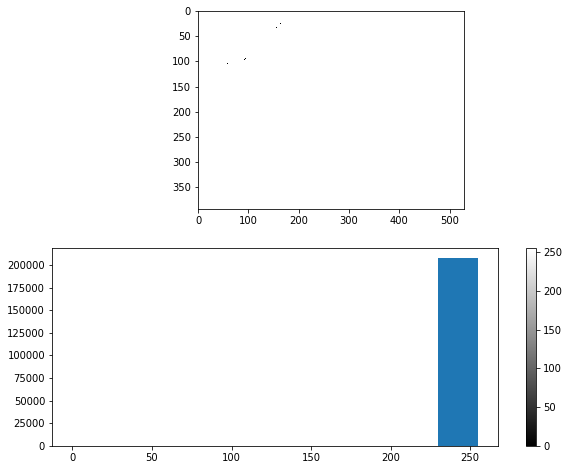

In [184]:
img7_p1 = binarization(img7, hist7_BHT)

In [171]:
img_bht = _BHT(get_hist(img))

33952 20091 1 255 128
33935 19882 2 255 129
33695 19731 3 255 130
33150 19731 4 255 130
32746 19534 5 255 131
32217 19534 6 255 131
31907 19359 7 255 132
31469 19359 8 255 132
31296 19171 9 255 133
31030 19171 10 255 133
30939 18986 11 255 134
30714 18986 12 255 134
30667 18817 13 255 135
30458 18817 14 255 135
30459 18622 15 255 136
30249 18622 16 255 136
30182 18474 17 255 137
29943 18474 18 255 137
29895 18305 19 255 138
29683 18305 20 255 138
29691 18123 21 255 139
29482 18123 22 255 139
29449 17930 23 255 140
29230 17930 24 255 140
29188 17749 25 255 141
28979 17749 26 255 141
28931 17590 27 255 142
28700 17590 28 255 142
28659 17415 29 255 143
28417 17415 30 255 143
28326 17250 31 255 144
28087 17250 32 255 144
28061 17065 33 255 145
27829 17065 34 255 145
27759 16869 35 255 146
27502 16869 36 255 146
27475 16654 37 255 147
27223 16654 38 255 147
27193 16447 39 255 148
26885 16447 40 255 148
26817 16215 41 255 149
26506 16215 42 255 149
26412 15983 43 255 150
26027 15983 44 255 1

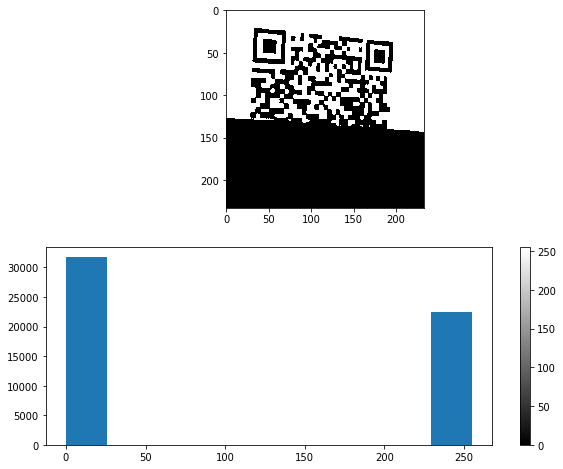

In [172]:
img_bht_p1 = binarization(img, img_bht)

3


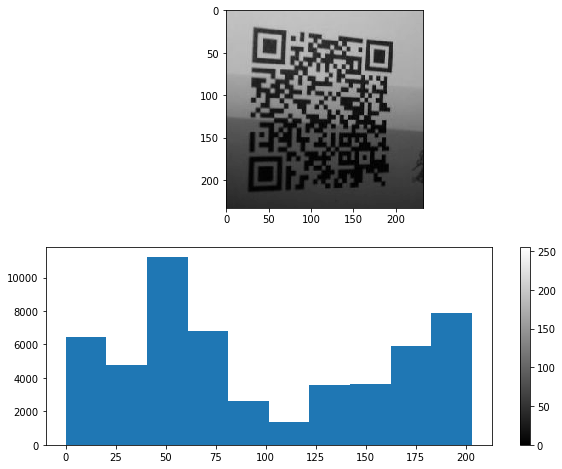

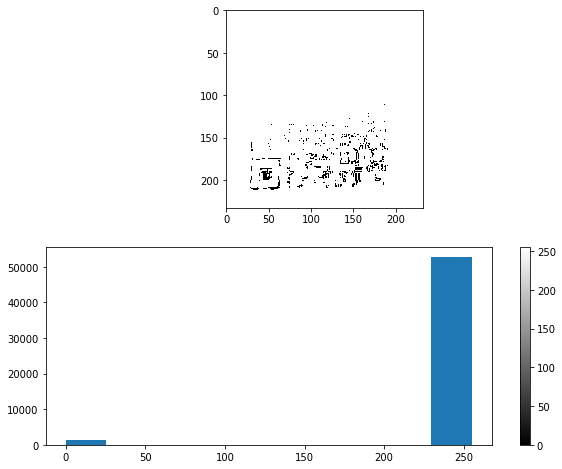

In [140]:
img1_p = binarization(img, _BHT(get_hist(img)))

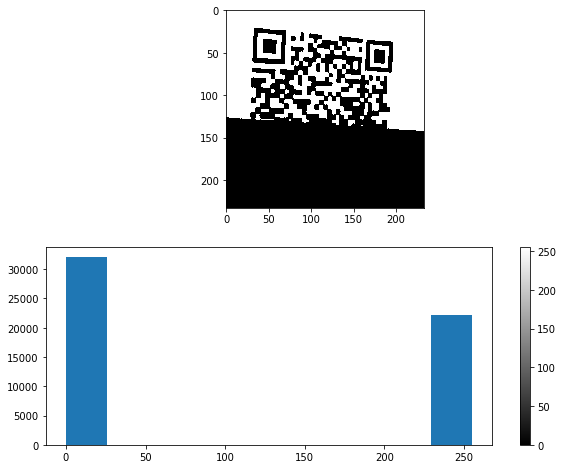

In [61]:
img1_p2 = box_BHT_threshold(img, 200)

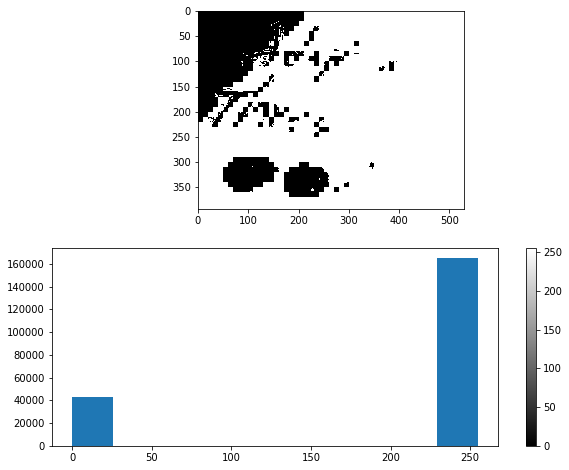

In [66]:
img7_p1 = box_BHT_threshold(img7, 10)

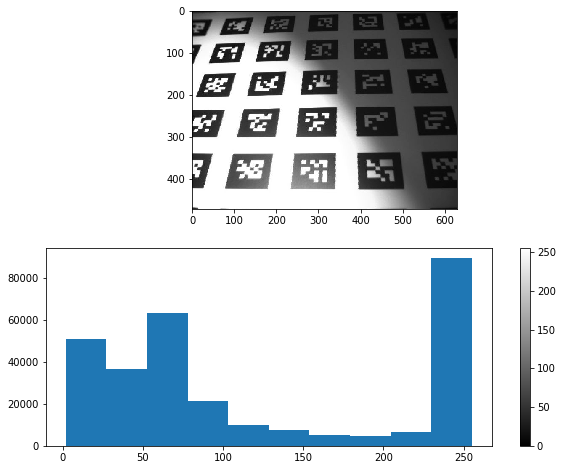

In [119]:
imshow(img2, 'gray')

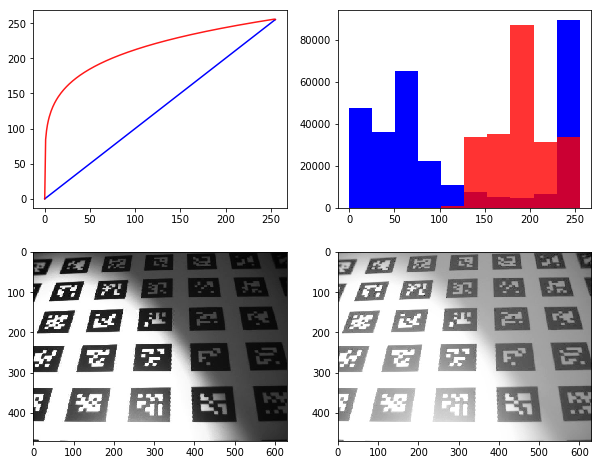

In [117]:
img2_h1 = gamma_process(img2, 0.2)

9 12


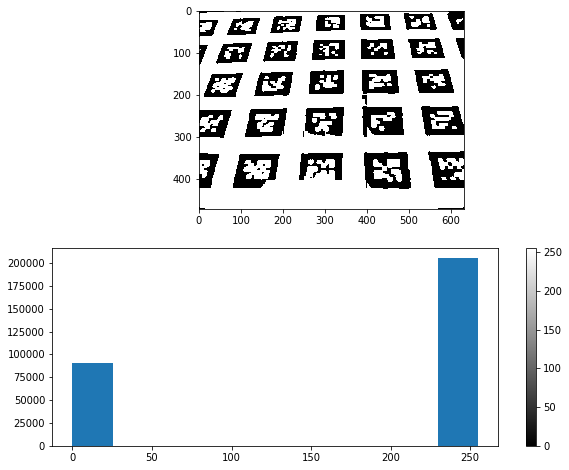

In [127]:
img2_t1 = box_mean_threshold(img2_h1, 50)

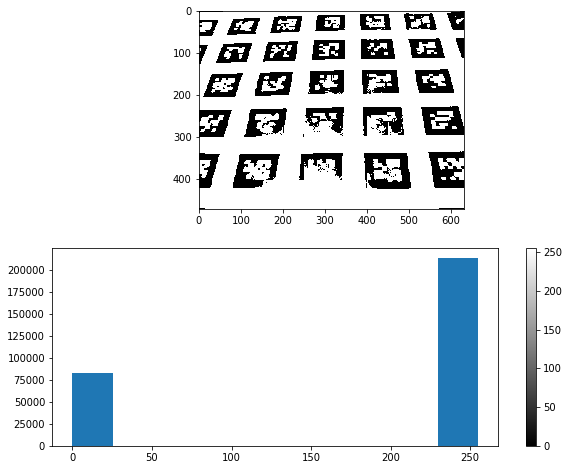

In [128]:
img2_t2 = box_gaussian_threshold(img2_h1, 50)

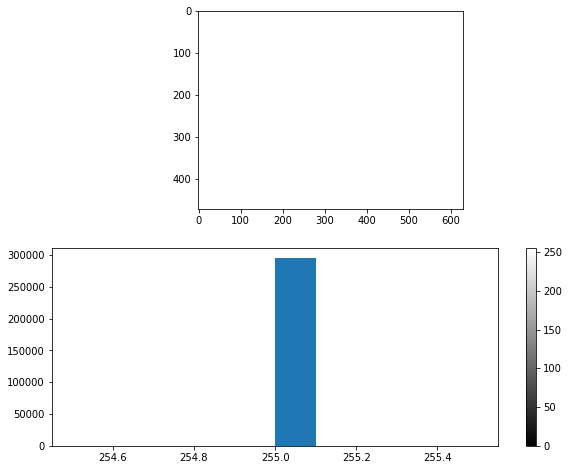

In [131]:
img2_t3 = box_BHT_threshold(img2_h1, 200, mean_range = 0)

In [132]:
img2_box = img2[0:200, 0:200]

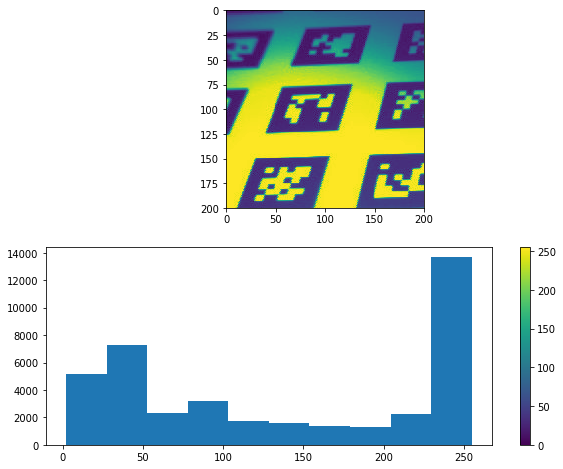

In [133]:
imshow(img2_box)

In [208]:
box_hist = get_hist(img2_box)
box_hist.shape

(256,)

In [207]:
np.sum(box_hist[127:256])

20418

In [203]:
find_center()

127

In [254]:
img2_bht = _BHT(box_hist)

19582 20418 0 255 127
7113
19582 13305 0 254 127
19582 13305 1 254 127
60
19642 13245 2 254 128
19640 13245 3 254 128
65
19704 13180 4 254 129
19703 13180 5 254 129
75
19772 13105 6 254 130
19771 13105 7 254 130
63
19820 13042 8 254 131
19797 13042 9 254 131
71
19835 12971 10 254 132
19785 12971 11 254 132
66
19784 12905 12 254 133
19646 12905 13 254 133
66
19525 12839 14 254 134
19332 12839 15 254 134
59
19192 12780 16 254 135
18913 12780 17 254 135
69
18598 12711 18 254 136
18238 12711 19 254 136
63
17923 12648 20 254 137
17601 12648 21 254 137
59
17349 12589 22 254 138
17027 12589 23 254 138
59
16762 12530 24 254 139
16445 12530 25 254 139
67
16171 12463 26 254 140
15739 12463 27 254 140
66
15346 12397 28 254 141
14934 12397 29 254 141
47
14604 12350 30 254 142
14275 12350 31 254 142
67
13993 12283 32 254 143
13645 12283 33 254 143
65
13360 12218 34 254 144
12932 12218 35 254 144
70
12662 12148 36 254 145
12245 12148 37 254 145
65
11919 12083 38 254 146
970
65
11854 11178 38 253 145

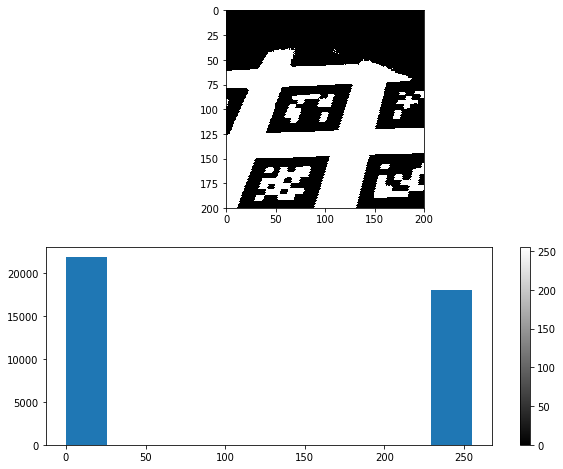

In [222]:
box_binary = binarization(img2_box, 164)

array([[105, 105, 106, ..., 114, 118, 120],
       [105, 106, 106, ..., 117, 121, 122],
       [106, 106, 106, ..., 119, 123, 123],
       ...,
       [115, 112, 108, ..., 108,  98, 148],
       [114, 113, 112, ..., 113, 103, 124],
       [119, 123, 126, ..., 148, 145, 137]], dtype=uint8)

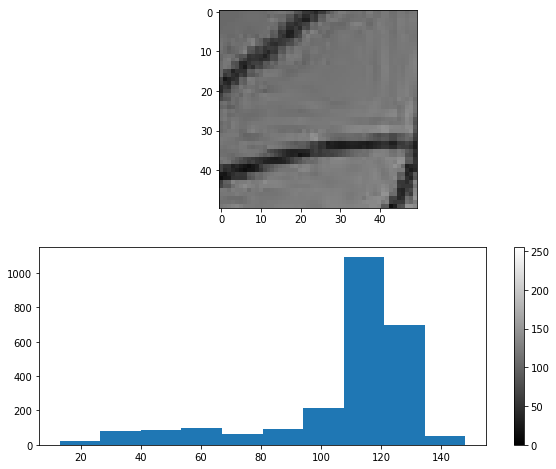

In [264]:
img7_box = img7[50:100, 100:150]
imshow(img7_box, 'gray')
img7_box

In [267]:
box_hist7 = get_hist(img7_box)
box_hist7

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         2,   1,   0,   1,   0,   1,   0,   1,   3,   1,   2,   1,   2,
         6,   4,   4,   7,   6,   8,   7,   7,   8,   9,   5,   4,   4,
         5,   4,   3,   5,   6,   4,   6,   8,   5,   3,   8,   7,  13,
         5,   8,  11,  12,   9,   2,   7,  11,   2,   9,   3,  11,   9,
         6,   6,   4,   6,   5,   3,   4,   6,   3,   9,   6,   2,   5,
         7,   1,   3,   3,   6,   6,   3,  11,   6,   5,   9,   8,   4,
         9,  12,   9,   7,   6,   6,   7,   5,   8,   9,  10,   8,  12,
        18,  28,  45,  46,  51,  49,  39,  54,  58,  59,  73, 105, 134,
       132, 131, 111, 100, 108,  76,  89,  89,  77,  58,  42,  38,  28,
        28,  22,  13,  15,  16,   7,   8,   9,   3,   3,   4,   2,   2,
         3,   1,   4,   3,   1,   3,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [266]:
img7_bht = _BHT(box_hist7)

2245 255 0 255 127
42
2287 213 1 255 128
2287 213 2 255 128
38
2325 175 3 255 129
2325 175 4 255 129
28
2353 147 5 255 130
2353 147 6 255 130
28
2381 119 7 255 131
2381 119 8 255 131
22
2403 97 9 255 132
2403 97 10 255 132
13
2416 84 11 255 133
2416 84 12 255 133
15
2431 69 13 255 134
2429 69 14 255 134
16
2444 53 15 255 135
2444 53 16 255 135
7
2450 46 17 255 136
2450 46 18 255 136
8
2457 38 19 255 137
2457 38 20 255 137
9
2465 29 21 255 138
2462 29 22 255 138
3
2464 26 23 255 139
2462 26 24 255 139
3
2464 23 25 255 140
2462 23 26 255 140
4
2460 19 27 255 141
2456 19 28 255 141
2
2454 17 29 255 142
2447 17 30 255 142
2
2443 15 31 255 143
2435 15 32 255 143
3
2431 12 33 255 144
2424 12 34 255 144
1
2417 11 35 255 145
2408 11 36 255 145
4
2407 7 37 255 146
2403 7 38 255 146
3
2402 4 39 255 147
2397 4 40 255 147
1
2394 3 41 255 148
2391 3 42 255 148
3
2389 0 43 255 149
2383 0 44 255 149
0
2379 0 45 255 150
2373 0 46 255 150
0
2365 0 47 255 151
2360 0 48 255 151
0
2357 0 49 255 152
2349 0

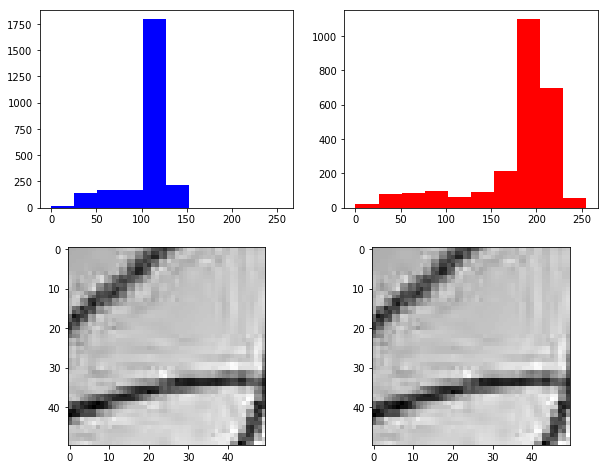

In [268]:
img7_box2 = hist_stretching(img7_box)

In [269]:
box_hist2 = get_hist(img7_box2)
box_hist2
img7_bht = _BHT(box_hist2)

346 2154 0 255 127
3
346 2151 0 254 127
0
3
343 2154 0 253 126
1
343 2153 0 252 126
0
0
343 2153 0 251 125
3
343 2150 0 250 125
0
1
342 2151 0 249 124
4
342 2147 0 248 124
0
0
342 2147 0 247 123
1
342 2146 0 246 123
0
7
335 2153 0 245 122
3
335 2150 0 244 122
0
0
335 2150 0 243 121
2
335 2148 0 242 121
0
5
330 2153 0 241 120
2
330 2151 0 240 120
0
2
328 2153 0 239 119
4
328 2149 0 238 119
3
0
328 2146 0 237 118
0
328 2146 0 236 118
3
6
322 2149 0 235 117
0
322 2149 0 234 117
9
0
322 2140 0 233 116
0
322 2140 0 232 116
8
9
313 2141 0 231 115
0
313 2141 0 230 115
7
0
313 2134 0 229 114
0
313 2134 0 228 114
16
3
310 2121 0 227 113
0
310 2121 0 226 113
15
0
310 2106 0 225 112
0
310 2106 0 224 112
13
6
304 2099 0 223 111
0
304 2099 0 222 111
22
0
304 2077 0 221 110
28
304 2049 0 220 110
0
4
300 2053 0 219 109
28
300 2025 0 218 109
0
0
300 2025 0 217 108
38
300 1987 0 216 108
0
3
297 1990 0 215 107
42
297 1948 0 214 107
0
0
297 1948 0 213 106
58
297 1890 0 212 106
0
5
292 1895 0 211 105
77
2